Data cleaning and visualisation script

In [50]:
#importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
#load the data from the respective file
df = pd.read_csv('trafic_ma_long.csv')


In [52]:
#Transforming the tables to compare Jan-Jun traffic to that of the entire year (cumulative)
df_pivot = df.pivot_table(index=["Airport", "Year"], 
                          columns="Month", 
                          values="Traffic").reset_index()
#Renaming columns to respect our naming conventions
df_pivot = df_pivot.rename(columns={
    "Dec": "cumulative_annual",
    "Jun": "s1",
    "Airport":"airport",
    "Year":"year"
})
df_pivot['airport']=df_pivot['airport'].str.lower()

df_pivot.head()

Month,airport,year,cumulative_annual,s1
0,agadir,2009,1456217.0,NaN
1,agadir,2010,1627485.0,762741.0
2,agadir,2011,1516247.0,771894.0
3,agadir,2012,1384931.0,661106.0
4,agadir,2013,1479341.0,698320.0


In [53]:
#Create a new column s2 that only contains the traffic generated in Jun-Dec
df_pivot["s2"] = df_pivot["cumulative_annual"] - df_pivot["s1"]

#Transform our table for visualisation
df_long = pd.melt(df_pivot, 
                  id_vars=["airport", "year"], 
                  value_vars=["s1", "s2"], 
                  var_name="semester", 
                  value_name="traffic")
df_long["period"] = df_long["year"].astype(str) + "_" + df_long["semester"]

df_long = df_long.sort_values(by=["airport", "year", "semester"])
df_long = df_long.reset_index(drop=True)
df_long.head()



,airport,year,semester,traffic,period
0,agadir,2009,s1,NaN,2009_s1
1,agadir,2009,s2,NaN,2009_s2
2,agadir,2010,s1,762741.0,2010_s1
3,agadir,2010,s2,864744.0,2010_s2
4,agadir,2011,s1,771894.0,2011_s1


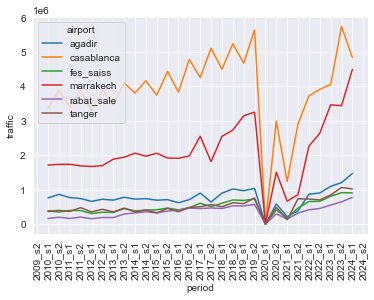

In [54]:
#Visualise the traffic trends per airport per year
sns.set_style("darkgrid")
ax = sns.lineplot(data=df_long,x="period",y="traffic",hue="airport")
ax.tick_params(axis='x', rotation=90)
plt.show()


In [55]:
#Save the new cleaned data
df_long.to_csv('trafic_ma_long_clean_new.csv')